In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [2]:
run_path = '../'
test_name = 'Heat_Eq_1+1D'
test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

<Figure size 700x700 with 0 Axes>

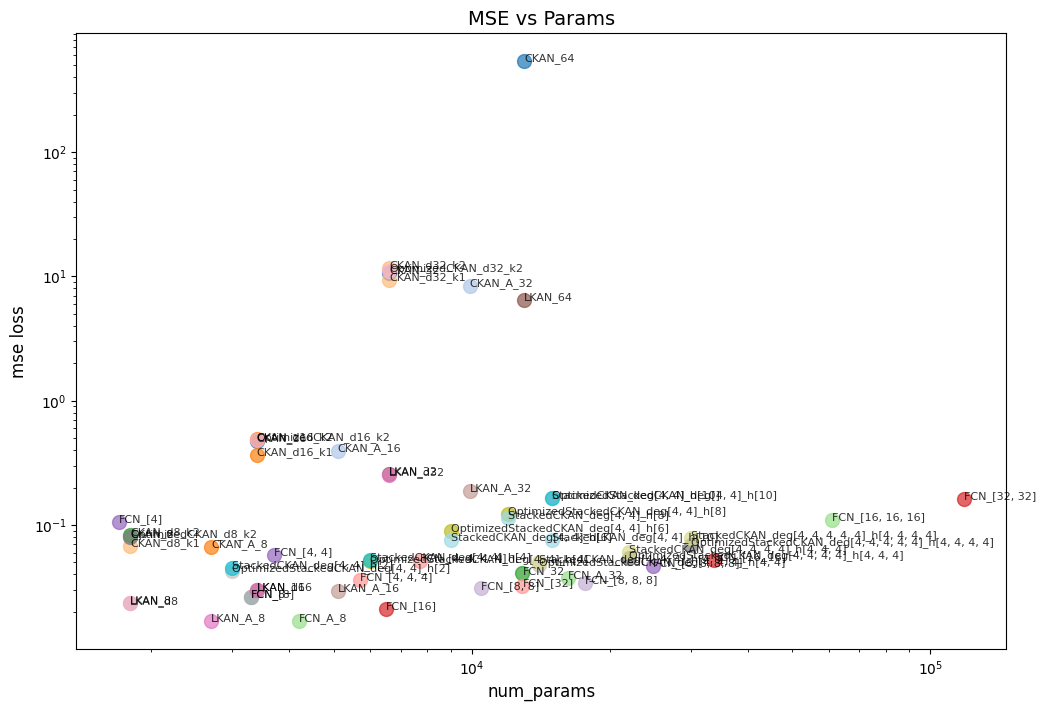

In [4]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

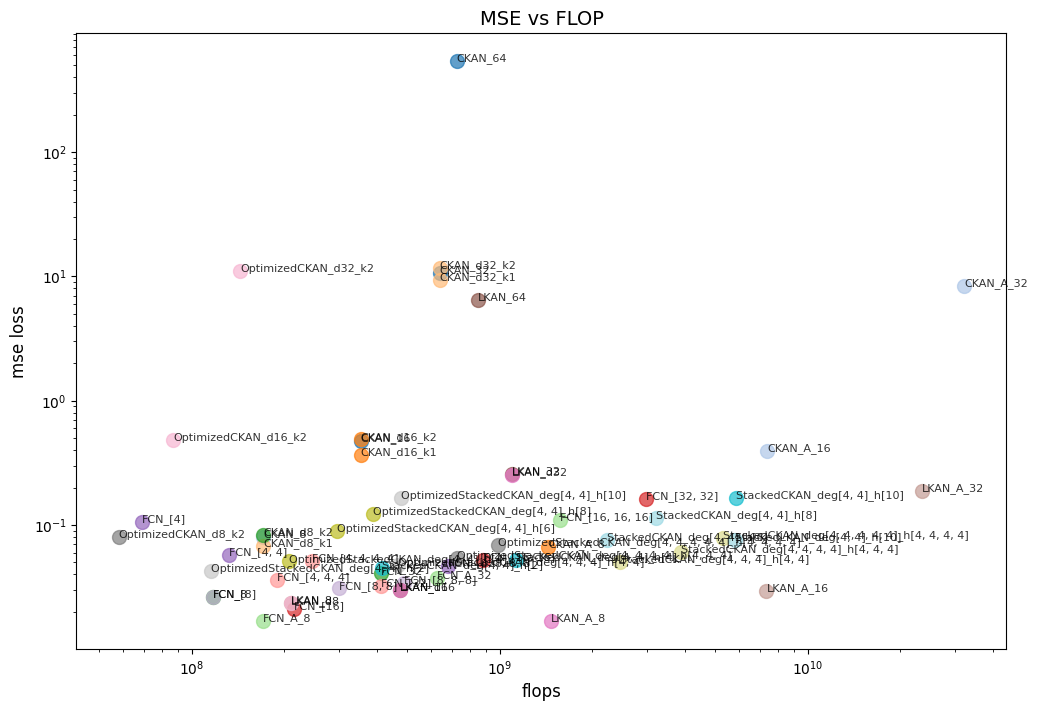

In [5]:
analyser.plot_mse_over_flops()

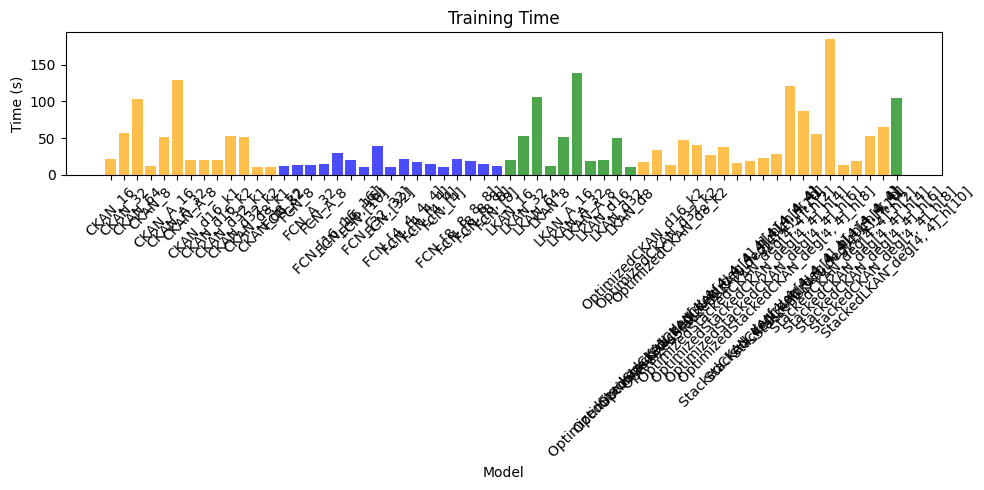

In [6]:
analyser.plot_training_times()

In [7]:
import json

for run in analyser.runs:
    with open(os.path.join(test_path, run, 'test_meta.json'), 'r') as f:
        m = json.load(f)
        print(f'{run}: {m['param_count'][0]/100}')

CKAN_16: 34.0
CKAN_32: 66.0
CKAN_64: 130.0
CKAN_8: 18.0
CKAN_A_16: 51.0
CKAN_A_32: 99.0
CKAN_A_8: 27.0
CKAN_d16_k1: 34.0
CKAN_d16_k2: 34.0
CKAN_d32_k1: 66.0
CKAN_d32_k2: 66.0
CKAN_d8_k1: 18.0
CKAN_d8_k2: 18.0
FCN_32: 129.0
FCN_8: 33.0
FCN_A_32: 162.0
FCN_A_8: 42.0
FCN_[16, 16, 16]: 609.0
FCN_[16, 16]: 337.0
FCN_[16]: 65.0
FCN_[32, 32]: 1185.0
FCN_[32]: 129.0
FCN_[4, 4, 4, 4]: 77.0
FCN_[4, 4, 4]: 57.0
FCN_[4, 4]: 37.0
FCN_[4]: 17.0
FCN_[8, 8, 8, 8]: 249.0
FCN_[8, 8, 8]: 177.0
FCN_[8, 8]: 105.0
FCN_[8]: 33.0
LKAN_16: 34.0
LKAN_32: 66.0
LKAN_64: 130.0
LKAN_8: 18.0
LKAN_A_16: 51.0
LKAN_A_32: 99.0
LKAN_A_8: 27.0
LKAN_d16: 34.0
LKAN_d32: 66.0
LKAN_d8: 18.0
OptimizedCKAN_d16_k2: 34.0
OptimizedCKAN_d32_k2: 66.0
OptimizedCKAN_d8_k2: 18.0
OptimizedStackedCKAN_deg[4, 4, 4, 4, 4]_h[4, 4, 4, 4]: 300.0
OptimizedStackedCKAN_deg[4, 4, 4, 4]_h[4, 4, 4]: 220.0
OptimizedStackedCKAN_deg[4, 4, 4]_h[4, 4]: 140.0
OptimizedStackedCKAN_deg[4, 4]_h[10]: 150.0
OptimizedStackedCKAN_deg[4, 4]_h[2]: 30.0
OptimizedS

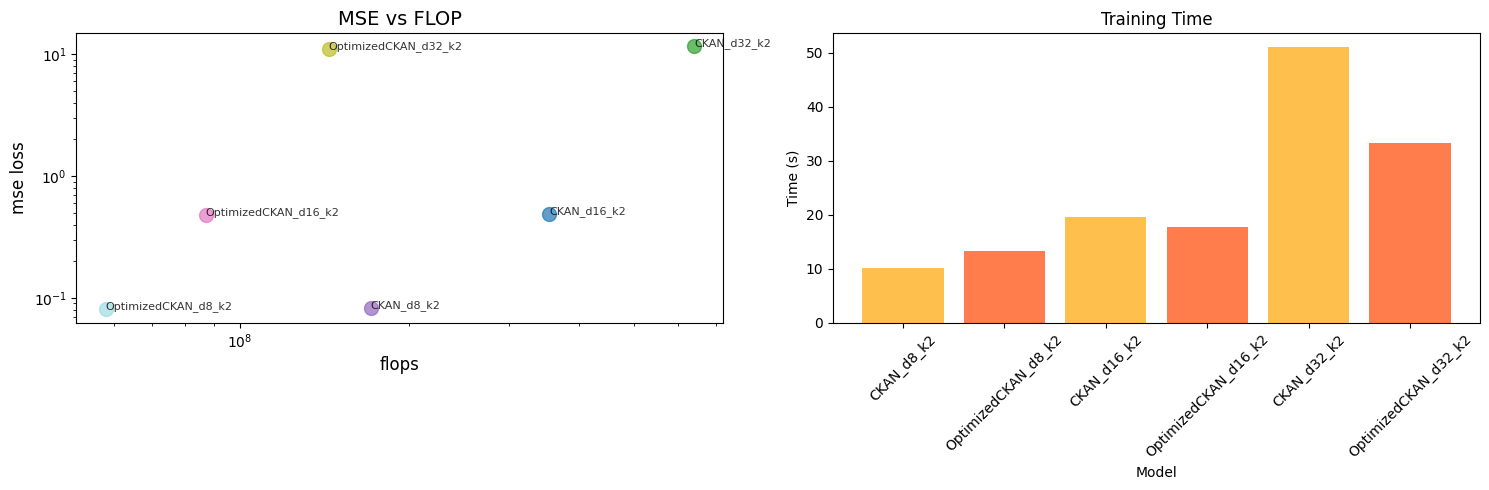

In [10]:
import re

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
analyser.plot_mse_over_flops(filter=lambda x: re.match('(Optimized)*CKAN_d[0-9]*_k2', x), noshow=True)
plt.subplot(1, 2, 2)
analyser.plot_training_times_from_list(l=[
    'CKAN_d8_k2',
    'OptimizedCKAN_d8_k2',
    'CKAN_d16_k2',
    'OptimizedCKAN_d16_k2',
    'CKAN_d32_k2',
    'OptimizedCKAN_d32_k2', 
], noshow=True)

plt.tight_layout()
plt.show()